<div style="background-color: #088F8F; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="text-align: center; font-size: 36px; color: white; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); margin-bottom: 10px;">Welcome to this Notebook</h1>
    <p style="text-align: center; font-size: 18px; color: white;"></p>
</div>

<div style="background-color: #AAD7D9; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">For training Data</p>
</div>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> 📌 Importing libraries </span></b>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Loading the csv file</span></b>

In [2]:
df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Showing first five rows</span></b>

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Dataset shape </span></b>

In [4]:
df.shape

(8693, 14)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌Removing unnecessary columns </span></b>

In [5]:
df.drop(columns=['PassengerId','Name'], axis=1, inplace=True)

In [6]:
df.head(4)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False


In [7]:
df.shape

(8693, 12)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Total information of the dataset </span></b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Checking null values </span></b>

In [9]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Extra statistical measures </span></b>

In [10]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Data Pre-processing </span></b>

In [11]:
columns=['HomePlanet','CryoSleep','VIP','Destination']

for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [13]:
numeric_cols=['RoomService','Spa','FoodCourt','ShoppingMall','VRDeck']

for nr in numeric_cols:
    df[nr].fillna(df[nr].mean(), inplace=True)

In [14]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [15]:
df.drop('Cabin',axis=1, inplace=True)

### Now, our dataset is cleaned 

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌Final Shape of the Dataset </span></b>

In [16]:
df.shape

(8693, 11)

<div style="background-color: #F6B17A; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Data Visualization</p>
</div>

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 20px; border-left: 8px solid #FF9800">i) Heatmap</span></b>

<Axes: >

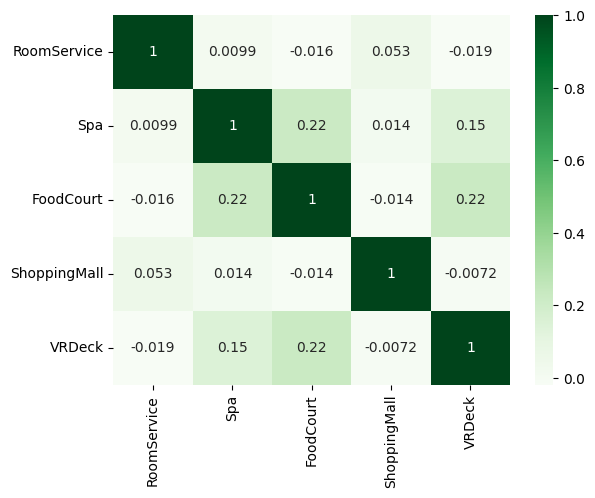

In [17]:
sn.heatmap(df[numeric_cols].corr(), annot=True, cmap='Greens')

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 20px; border-left: 8px solid #FF9800">ii) Pairplot</span></b>

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


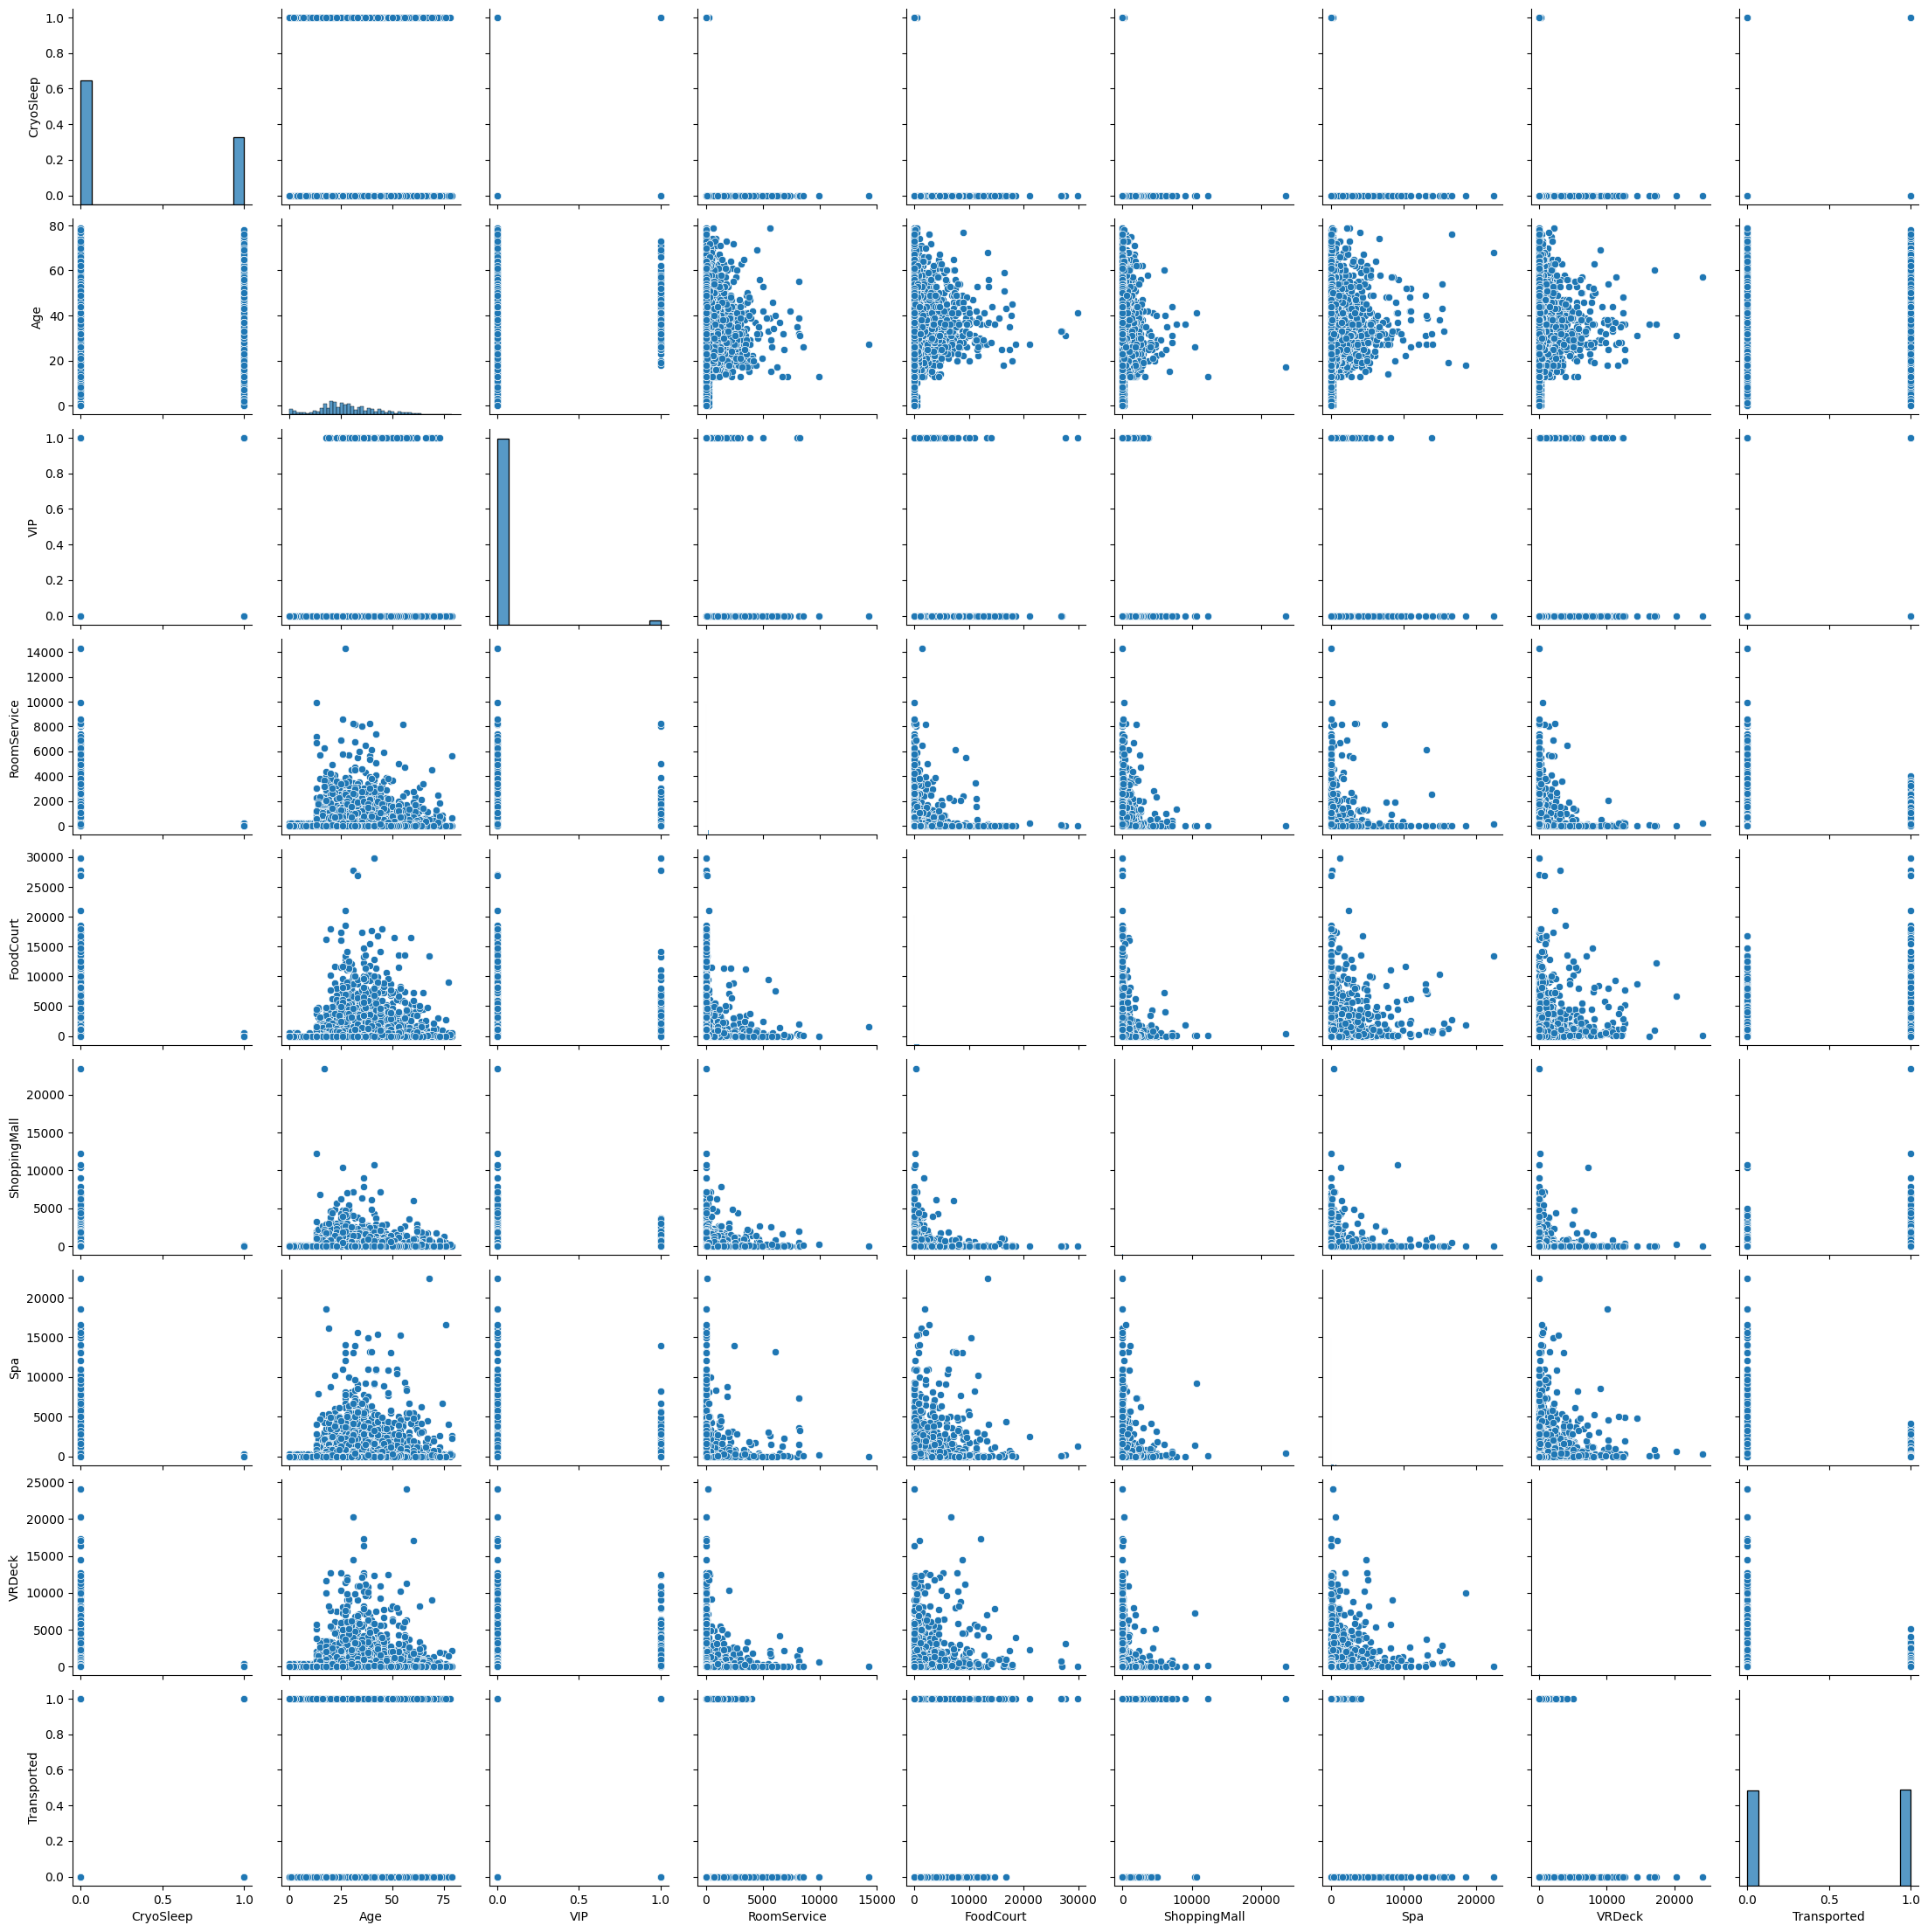

In [18]:
sn.pairplot(df)

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 20px; border-left: 8px solid #FF9800">iii) Histogram</span></b>

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

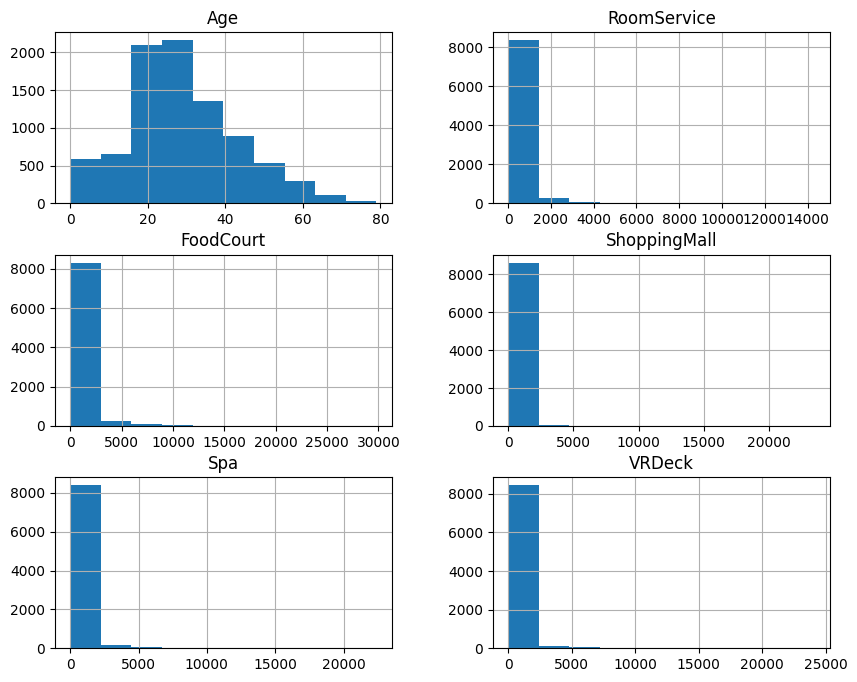

In [19]:
df.hist(figsize=(10, 8))

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Labeled Column </span></b>

In [20]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Transported'>

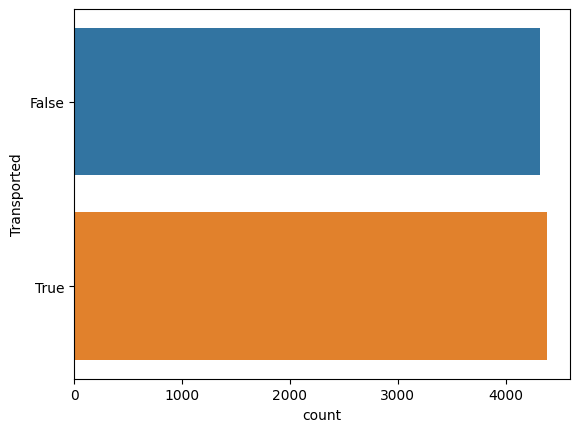

In [21]:
sn.countplot(y=df['Transported'])

In [22]:
le=LabelEncoder()
df['Transported']=le.fit_transform(df['Transported'])

In [23]:
df['Transported'].value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

--------------------------------------------------------------------------------------------------

In [24]:
print(df['HomePlanet'].value_counts())
print('')
print(df['CryoSleep'].value_counts())
print('')
print(df['Destination'].value_counts())
print('')
print(df['VIP'].value_counts())

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

VIP
False    8494
True      199
Name: count, dtype: int64


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Converted into numerical columns </span></b>

In [25]:
df['HomePlanet']=le.fit_transform(df['HomePlanet'])
df['CryoSleep']=le.fit_transform(df['CryoSleep'])
df['Destination']=le.fit_transform(df['Destination'])
df['VIP']=le.fit_transform(df['VIP'])

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">After Label Encoded </span></b>

In [26]:
print(df['HomePlanet'].value_counts())
print('')
print(df['CryoSleep'].value_counts())
print('')
print(df['Destination'].value_counts())
print('')
print(df['VIP'].value_counts())

HomePlanet
0    4803
1    2131
2    1759
Name: count, dtype: int64

CryoSleep
0    5656
1    3037
Name: count, dtype: int64

Destination
2    6097
0    1800
1     796
Name: count, dtype: int64

VIP
0    8494
1     199
Name: count, dtype: int64


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Showing the outliers </span></b>

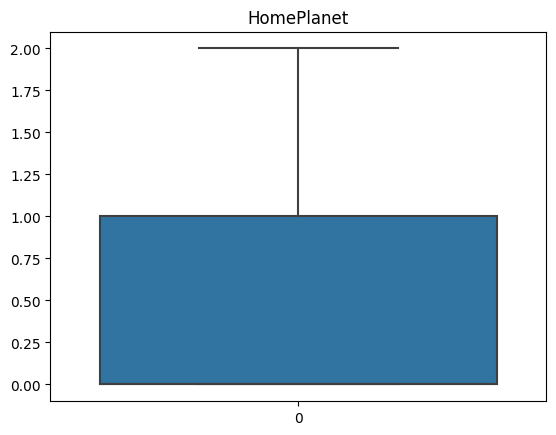

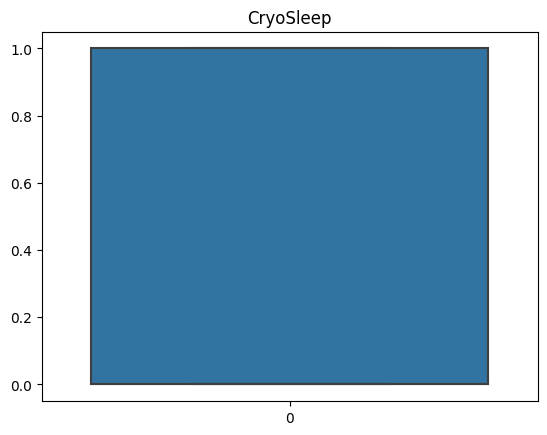

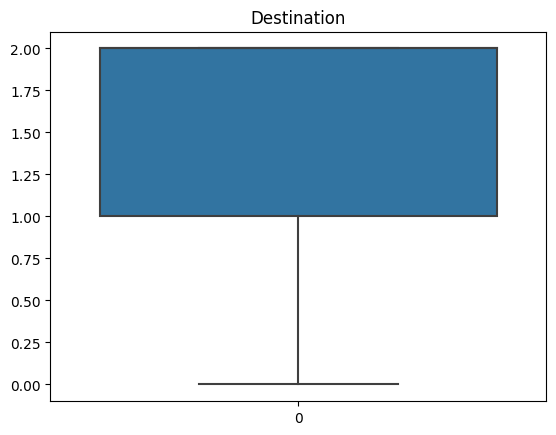

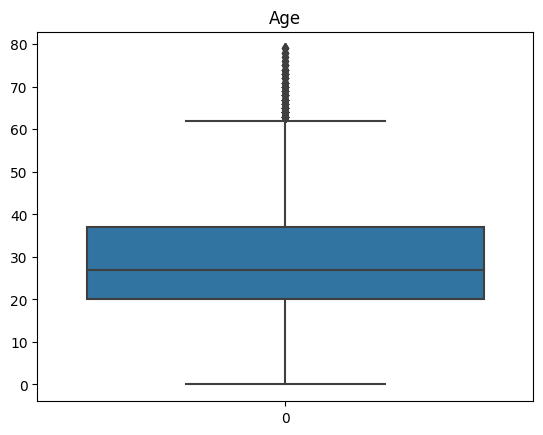

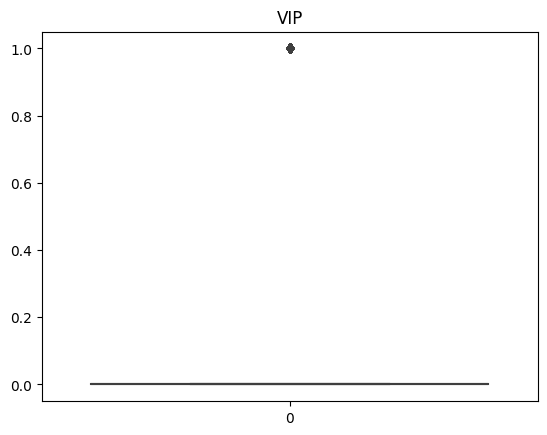

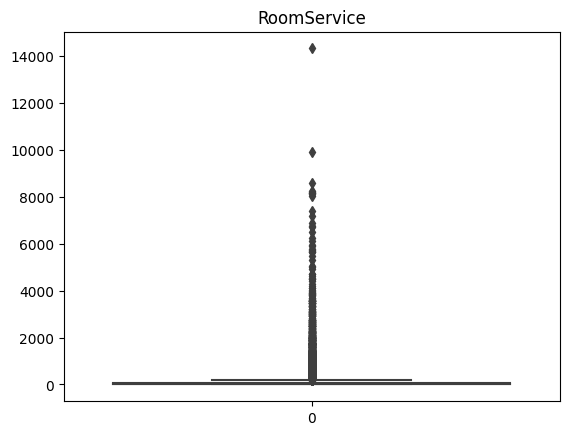

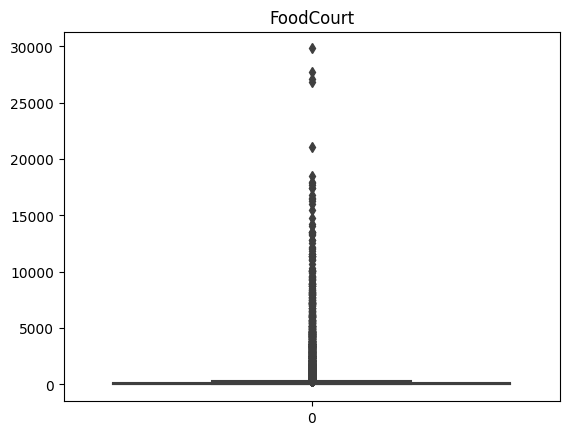

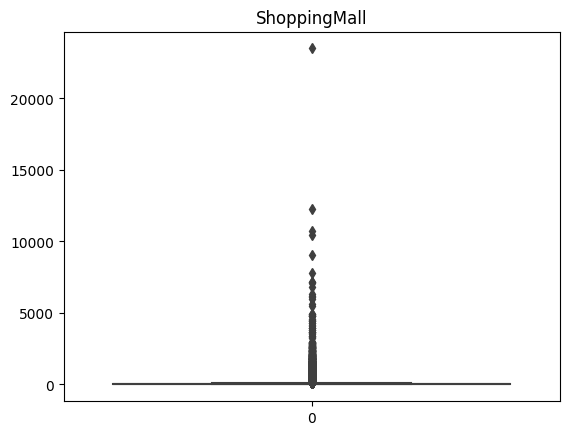

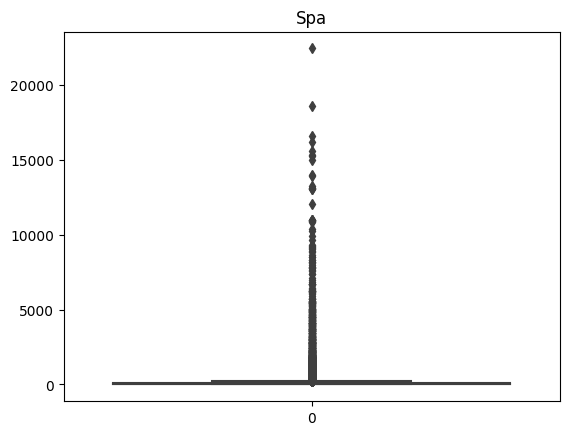

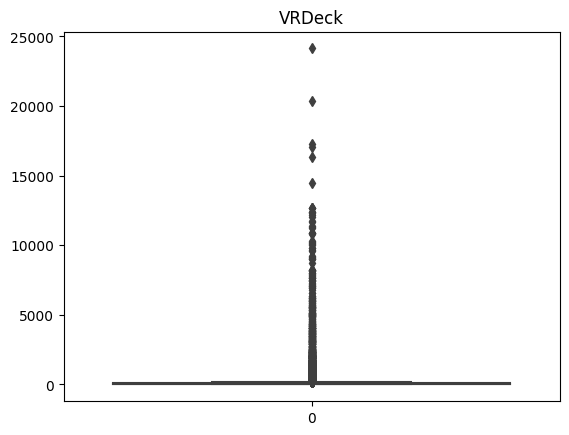

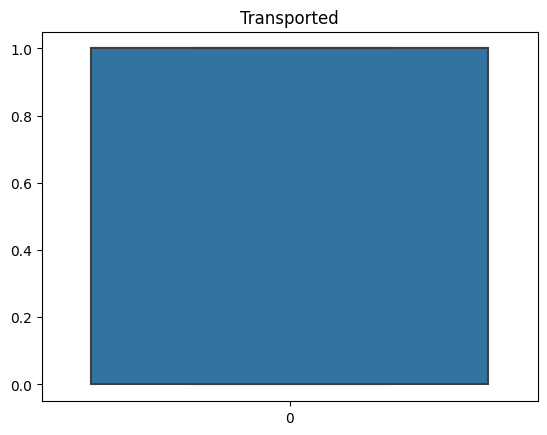

In [27]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.title(i)
    plt.show()

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Train Test Split </span></b>

In [28]:
X=df.drop('Transported', axis=1)
Y=df['Transported']

In [29]:
print(X)

      HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0              1          0            2  39.0    0          0.0        0.0   
1              0          0            2  24.0    0        109.0        9.0   
2              1          0            2  58.0    1         43.0     3576.0   
3              1          0            2  33.0    0          0.0     1283.0   
4              0          0            2  16.0    0        303.0       70.0   
...          ...        ...          ...   ...  ...          ...        ...   
8688           1          0            0  41.0    1          0.0     6819.0   
8689           0          1            1  18.0    0          0.0        0.0   
8690           0          0            2  26.0    0          0.0        0.0   
8691           1          0            0  32.0    0          0.0     1049.0   
8692           1          0            2  44.0    0        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  
0             

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape,X_train.shape, X_test.shape)

(8693, 10) (6954, 10) (1739, 10)


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 20px; border-left: 8px solid #A9A9A9">Scaling the data </span></b>

In [32]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
X_train

array([[ 1.70317586,  1.36791112,  0.61996573, ..., -0.2856113 ,
        -0.2744588 , -0.26351963],
       [ 1.70317586,  1.36791112,  0.61996573, ..., -0.2856113 ,
        -0.2744588 , -0.26351963],
       [ 0.4463969 ,  1.36791112,  0.61996573, ..., -0.2856113 ,
        -0.2744588 , -0.26351963],
       ...,
       [ 1.70317586, -0.73104165,  0.61996573, ..., -0.13345712,
        -0.26583388, -0.26351963],
       [-0.81038206,  1.36791112,  0.61996573, ..., -0.2856113 ,
        -0.2744588 , -0.26351963],
       [ 1.70317586,  1.36791112,  0.61996573, ..., -0.2856113 ,
        -0.2744588 , -0.26351963]])

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Model Training </span></b>

<b><span style="color: #3C0753; background-color:#CD8D7B; padding: 20px; font-size: 20px; border-left: 8px solid F037A5">i) Logistic Regression</span></b>

In [34]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

### Accuracy Score

In [35]:
print('Training Accuracy: ', lr.score(X_train,Y_train))
print('Testing Accuracy: ', lr.score(X_test,Y_test))

Training Accuracy:  0.7858786310037389
Testing Accuracy:  0.7860839562967222


### Confusion matrix

<Axes: >

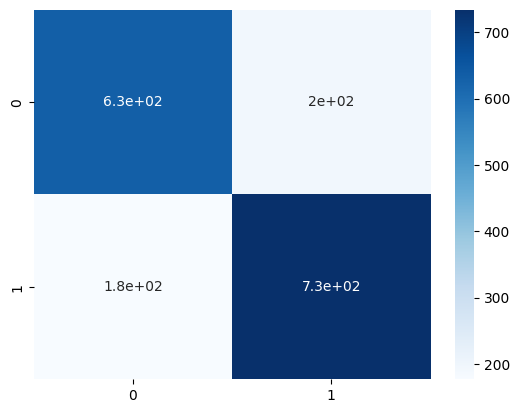

In [36]:
conf= confusion_matrix(Y_test, lr.predict(X_test))

sn.heatmap(conf, annot=True, cmap='Blues')

### Classification Report

In [37]:
report= classification_report(Y_test, lr.predict(X_test))

print(report)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       828
           1       0.79      0.81      0.80       911

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



<b><span style="color: #3C0753; background-color:#CD8D7B; padding: 20px; font-size: 20px; border-left: 8px solid F037A5">ii) Random Forest</span></b>

In [38]:
rf=RandomForestClassifier(n_estimators=20)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20)

### Accuracy Score

In [39]:
print('Training Accuracy: ', rf.score(X_train,Y_train))
print('Testing Accuracy: ', rf.score(X_test,Y_test))

Training Accuracy:  0.9331320103537533
Testing Accuracy:  0.7826336975273146


### Confusion Matrix

<Axes: >

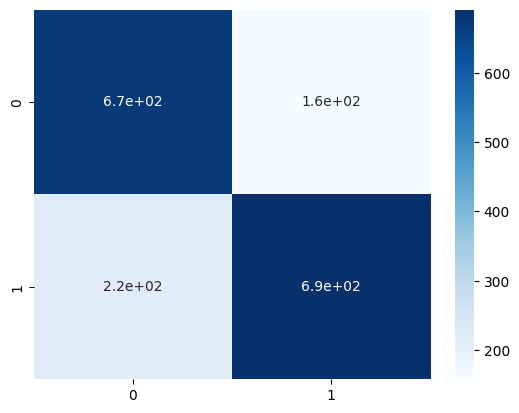

In [40]:
conf= confusion_matrix(Y_test, rf.predict(X_test))

sn.heatmap(conf, annot=True, cmap='Blues')

### Classification Report

In [41]:
report= classification_report(Y_test, rf.predict(X_test))

print(report)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       828
           1       0.81      0.76      0.79       911

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



<b><span style="color: #3C0753; background-color:#CD8D7B; padding: 20px; font-size: 20px; border-left: 8px solid F037A5">iii) XGBoost</span></b>

In [42]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Accuracy Score

In [43]:
print('Training Accuracy: ', xgb.score(X_train,Y_train))
print('Testing Accuracy: ', xgb.score(X_test,Y_test))

Training Accuracy:  0.8891285591026747
Testing Accuracy:  0.7837837837837838


### Confusion Matrix

<Axes: >

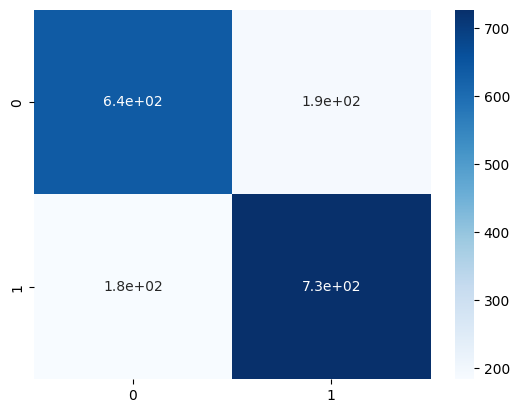

In [44]:
conf= confusion_matrix(Y_test, xgb.predict(X_test))

sn.heatmap(conf, annot=True, cmap='Blues')

### Classification Report

In [45]:
report1= classification_report(Y_test, xgb.predict(X_test))

print(report1)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       828
           1       0.79      0.80      0.79       911

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



<b><span style="color: #3C0753; background-color:#CD8D7B; padding: 20px; font-size: 20px; border-left: 8px solid F037A5">iv) SVM</span></b>

In [46]:
sv=SVC()
sv.fit(X_train,Y_train)

SVC()

### Accuracy Score

In [47]:
print('Training Accuracy: ', sv.score(X_train,Y_train))
print('Testing Accuracy: ', sv.score(X_test,Y_test))

Training Accuracy:  0.7930687374173138
Testing Accuracy:  0.7952846463484762


### Confusion Matrix

<Axes: >

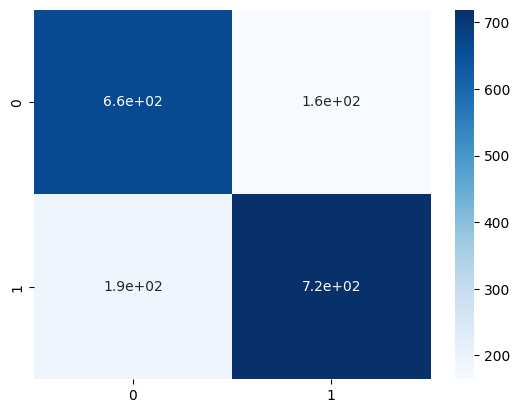

In [48]:
conf= confusion_matrix(Y_test, sv.predict(X_test))

sn.heatmap(conf, annot=True, cmap='Blues')

### Classification Report

In [49]:
report2= classification_report(Y_test, sv.predict(X_test))

print(report2)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       828
           1       0.81      0.79      0.80       911

    accuracy                           0.80      1739
   macro avg       0.79      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



<b><span style="color: #3C0753; background-color:#CD8D7B; padding: 20px; font-size: 20px; border-left: 8px solid F037A5">v) LGBM</span></b>

In [50]:
lgm=LGBMClassifier()
lgm.fit(X_train,Y_train)

LGBMClassifier()

### Accuracy Score

In [51]:
print('Training Accuracy: ', lgm.score(X_train,Y_train))
print('Testing Accuracy: ', lgm.score(X_test,Y_test))

Training Accuracy:  0.8526028185217142
Testing Accuracy:  0.7993099482461185


### Confusion Matrix

<Axes: >

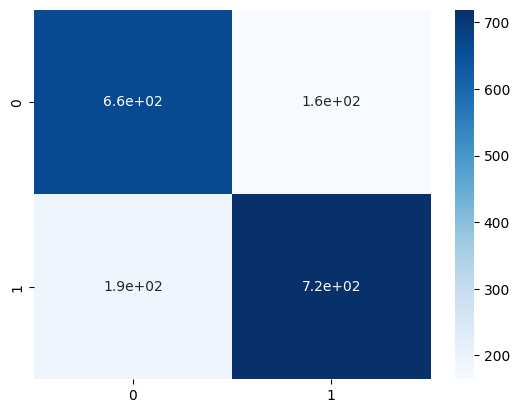

In [52]:
conf= confusion_matrix(Y_test, sv.predict(X_test))

sn.heatmap(conf, annot=True, cmap='Blues')

### Classification Report

In [53]:
report3= classification_report(Y_test, lgm.predict(X_test))

print(report3)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       828
           1       0.80      0.82      0.81       911

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



<b><span style="color: #3C0753; background-color:#CD8D7B; padding: 20px; font-size: 20px; border-left: 8px solid F037A5">vi) KNN</span></b>

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

### Accuracy Score

In [55]:
print('Training Accuracy: ', knn.score(X_train,Y_train))
print('Testing Accuracy: ', knn.score(X_test,Y_test))

Training Accuracy:  0.8395168248490078
Testing Accuracy:  0.7515813686026452


### Confusion Matrix

<Axes: >

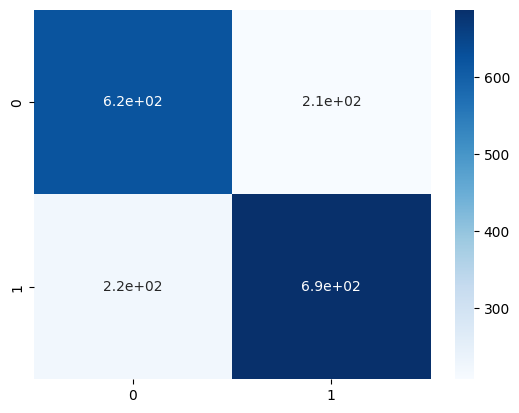

In [56]:
conf= confusion_matrix(Y_test, knn.predict(X_test))

sn.heatmap(conf, annot=True, cmap='Blues')

### Classification Report

In [57]:
report4= classification_report(Y_test, knn.predict(X_test))

print(report4)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       828
           1       0.77      0.75      0.76       911

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739



<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 22px; border-left: 8px solid #A9A9A9">By this, we are considering our model as SVM </span></b>

<div style="background-color: #A1EEBD; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">For Testing Data</p>
</div>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Loading the csv file</span></b>

In [58]:
test_data=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [59]:
sample1=test_data['PassengerId'].copy()

In [60]:
sample1

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Showing first five rows</span></b>

In [61]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Dataset shape </span></b>

In [62]:
test_data.shape

(4277, 13)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌 Checking null values </span></b>

In [63]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">📌Removing unnecessary columns </span></b>

In [64]:
Test_Data=test_data.drop(columns=['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [65]:
test_data.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Data Pre-processing </span></b>

In [66]:
columns=['HomePlanet','CryoSleep','VIP','Destination']

for col in columns:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

In [67]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

In [68]:
numeric_cols=['RoomService','Spa','FoodCourt','ShoppingMall','VRDeck']

for nr in numeric_cols:
    test_data[nr].fillna(test_data[nr].mean(), inplace=True)

In [69]:
test_data['HomePlanet']=le.fit_transform(test_data['HomePlanet'])
test_data['CryoSleep']=le.fit_transform(test_data['CryoSleep'])
test_data['Destination']=le.fit_transform(test_data['Destination'])
test_data['VIP']=le.fit_transform(test_data['VIP'])

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 24px; border-left: 8px solid #A9A9A9">Showing the outliers </span></b>

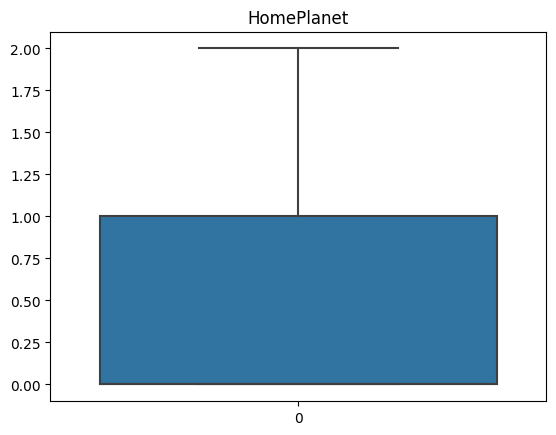

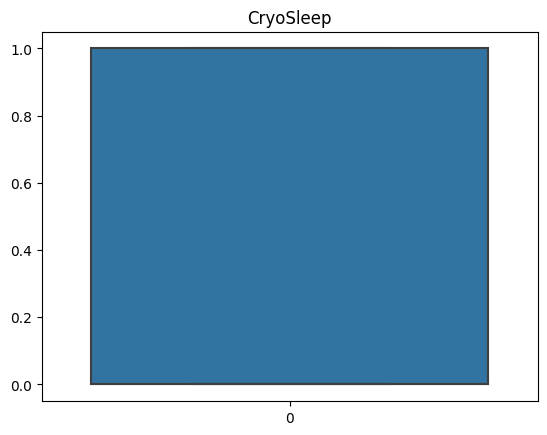

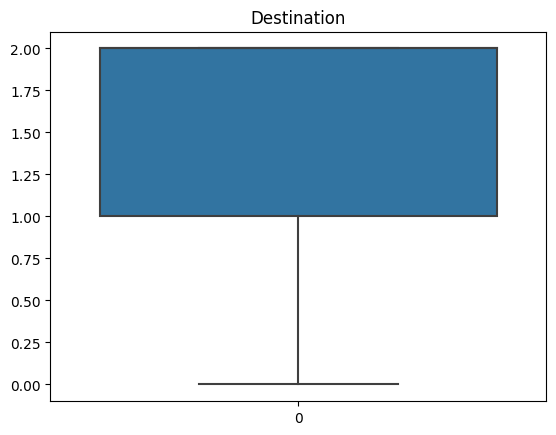

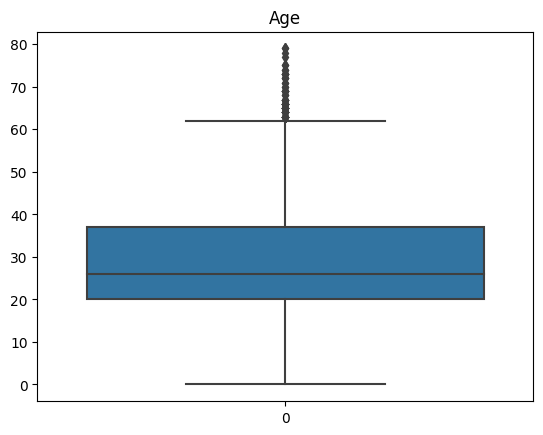

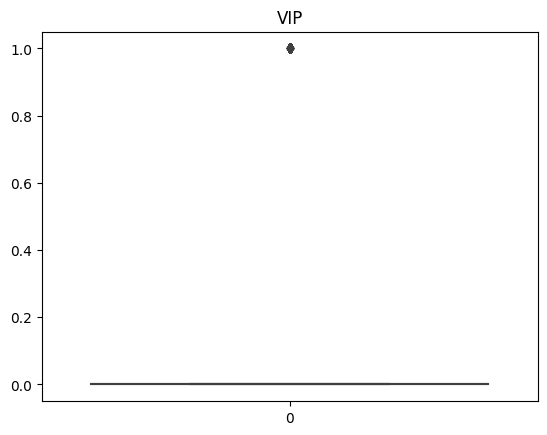

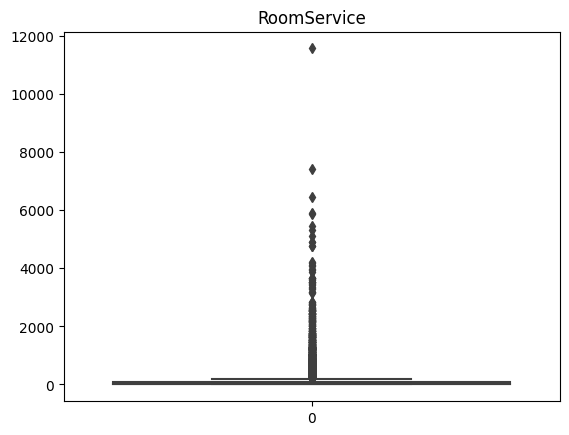

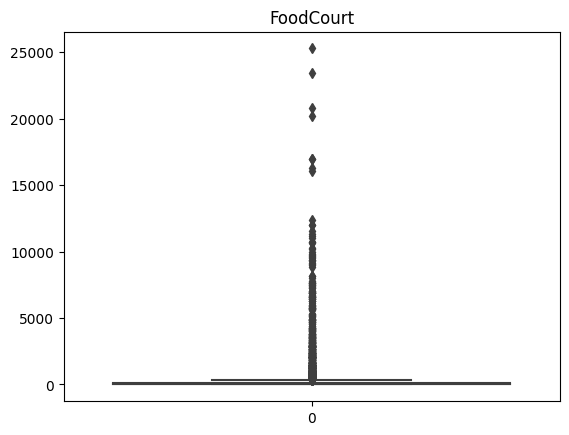

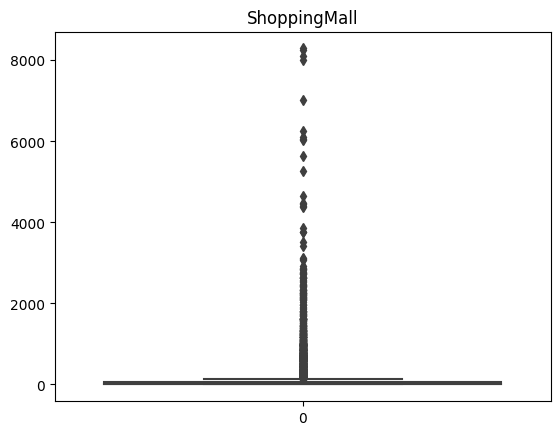

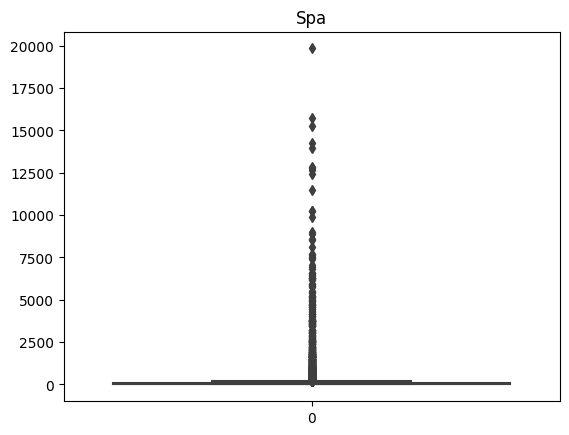

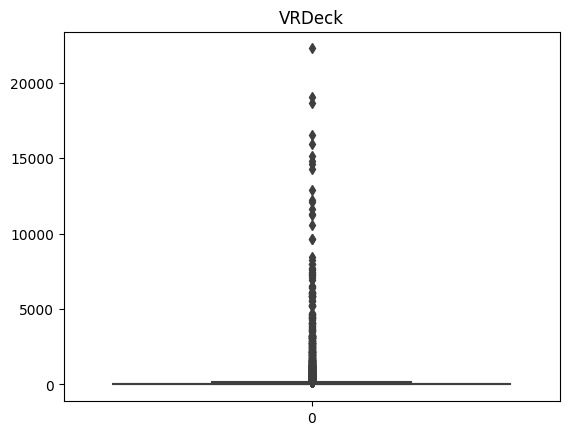

In [70]:
for i in test_data.columns:
    sn.boxplot(test_data[i])
    plt.title(i)
    plt.show()

<div style="background-color: #8ADAB2; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">For Kaggle Submissions</p>
</div>

In [71]:
test_pre=sc.transform(test_data)
prediction=sv.predict(test_pre)

In [72]:
pd.DataFrame(prediction)

,0
0,1
1,0
2,1
3,1
4,0
...,...
4272,1
4273,0
4274,1
4275,1


In [73]:
mapped_prediction = np.array(['True' if x == 1 else 'False' for x in prediction])

mapped_prediction = np.where(prediction == 1, 'True', 'False')

In [74]:
pd.DataFrame(mapped_prediction)

,0
0,True
1,False
2,True
3,True
4,False
...,...
4272,True
4273,False
4274,True
4275,True


In [75]:
submission=pd.DataFrame({'PassengerId':sample1, 'Transported':mapped_prediction})
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [76]:
submission.to_csv('submission.csv', index=False)

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 24px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Thank you for exploring my notebook!</p>
</div>